<a href="https://colab.research.google.com/github/sky309/Global-Terrorism-Analysis/blob/main/Sarvesh_Kumar_Yadav_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file='/content/drive/MyDrive/AlmaBetter/Modules/week3/09-06-2021-/Assignment/Copy of Global Terrorism Data.csv'

In [ ]:
df= pd.read_csv(file, encoding= "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Analysis based on Indian Terrorist Group:
#1) Top terrorist prone cities  in India v/s number of attacks
#2) Top state by number of attacks vs. Terrorist group
  # 3) Number of damages vs Type of Attacks
# 4) Number of Attacks happen in each year '''


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
sub_df = df[['eventid','iyear','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname']]

In [ ]:
sub_df.rename(columns={'eventid':'id','iyear':'year','country_txt':'country','provstate':'state','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','provstat':'total_wou*nds','gname':'terrorist_group'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sub_df


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosive,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,1.0,NaN,2.0,Al-Shabaab
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,2.0,Mortars were used in the attack.,7.0,Muslim extremists
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,0.0,NaN,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),0.0,A thrown grenade was used in the attack.,0.0,Unknown


#Top terrorist prone cities in India v/s number of attack


In [ ]:
sub_df

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosive,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,1.0,NaN,2.0,Al-Shabaab
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,2.0,Mortars were used in the attack.,7.0,Muslim extremists
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,0.0,NaN,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),0.0,A thrown grenade was used in the attack.,0.0,Unknown


In [ ]:
df_India= sub_df[sub_df['country']=='India']
df_India

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA)
7337,197901130004,1979,India,South Asia,Assam,Unknown,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People
...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,India,South Asia,Kerala,Koothuparamba,Bombing/Explosion,Police,0.0,A crude bomb was used in the attack.,0.0,Unknown
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist)
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM)
181684,201712310019,2017,India,South Asia,Assam,Hungrum,Hostage Taking (Kidnapping),Government (General),0.0,A 9-mm carbine rifle was used in the attack.,0.0,Zeliangrong United Front


In [ ]:

city= df_India['city']
list_city= city.tolist()
list_state=df_India['state'].tolist()
list_state
list_city
new_city_list=[]
for i in range(len(list_city)):
   if (list_city[i]=='Unknown'):
      new_city_list.append(list_state[i])
   else:
      new_city_list.append(list_city[i])
new_city_list

['New Delhi',
 'Samastipur',
 'New Delhi',
 'Bombay',
 'Assam',
 'Imphal',
 'Manipur',
 'Mizoram',
 'Assam',
 'Aizawl',
 'Aizawl',
 'Amapur',
 'Raisikah',
 'Champhai',
 'Aizawl',
 'Jamshedpur',
 'New Delhi',
 'New Delhi',
 'Jamshedpur',
 'Chennai',
 'Manipur',
 'Uttar Pradesh',
 'Manipur',
 'Bihar',
 'Imphal',
 'Manipur',
 'Chiaplant',
 'Tindol',
 'Calcutta',
 'New Delhi',
 'Tirupattur',
 'Assam',
 'Assam',
 'Assam',
 'Manipur',
 'Assam',
 'Assam',
 'Gauhati',
 'Gauhati',
 'Jorhat',
 'Nagaland',
 'Assam',
 'Unknown',
 'Manipur',
 'Assam',
 'Manipur',
 'Massad',
 'New Delhi',
 'Chandigarh',
 'Chandigarh',
 'Manipur',
 'West Bengal',
 'Gauhati',
 'New Delhi',
 'Aizawl',
 'Mizoram',
 'Jodhpur',
 'Bombay',
 'Amritsar',
 'Tipaimukh',
 'Amritsar',
 'New Delhi',
 'Bombay',
 'Assam',
 'New Delhi',
 'New Delhi',
 'New Delhi',
 'Gauhati',
 'Guwahati',
 'New Delhi',
 'New Delhi',
 'Assam',
 'Gauhati',
 'Harchowal',
 'Mothan Wala',
 'Qadian',
 'Punjab',
 'Baloda Bazar',
 'Gauhati',
 'Gauhati',
 'G

In [ ]:
for i in range(len(new_city_list)):
  if new_city_list[i]=='Unknown':
    new_city_list[i]= 'Srinagar'
    continue

In [ ]:
df_India['city']= new_city_list
df_India

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA)
7337,197901130004,1979,India,South Asia,Assam,Assam,Armed Assault,Police,2.0,Automatic firearm,NaN,Naga People
...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,India,South Asia,Kerala,Koothuparamba,Bombing/Explosion,Police,0.0,A crude bomb was used in the attack.,0.0,Unknown
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist)
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM)
181684,201712310019,2017,India,South Asia,Assam,Hungrum,Hostage Taking (Kidnapping),Government (General),0.0,A 9-mm carbine rifle was used in the attack.,0.0,Zeliangrong United Front


In [ ]:
df_India[df_India['city']== 'Unknown']

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group


In [238]:
df_number_of_attacks_by_cities =df_India['city'].value_counts().rename_axis('unique_cities').reset_index(name='number_of_attacks')
df_sorted_city_by_attacks= df_number_of_attacks_by_cities.sort_values(['number_of_attacks'], ascending= False).reset_index(drop= True)

In [ ]:
df_sorted_city_by_attacks

,unique_cities,number_of_attacks
0,Srinagar,658
1,Imphal,426
2,New Delhi,157
3,Punjab,155
4,Amritsar,138
...,...,...
4817,Saint Mery Basti,1
4818,Gulnaz Panzan,1
4819,Tulana,1
4820,Jaldega,1


Text(0, 0.5, 'Number Of Attacks')

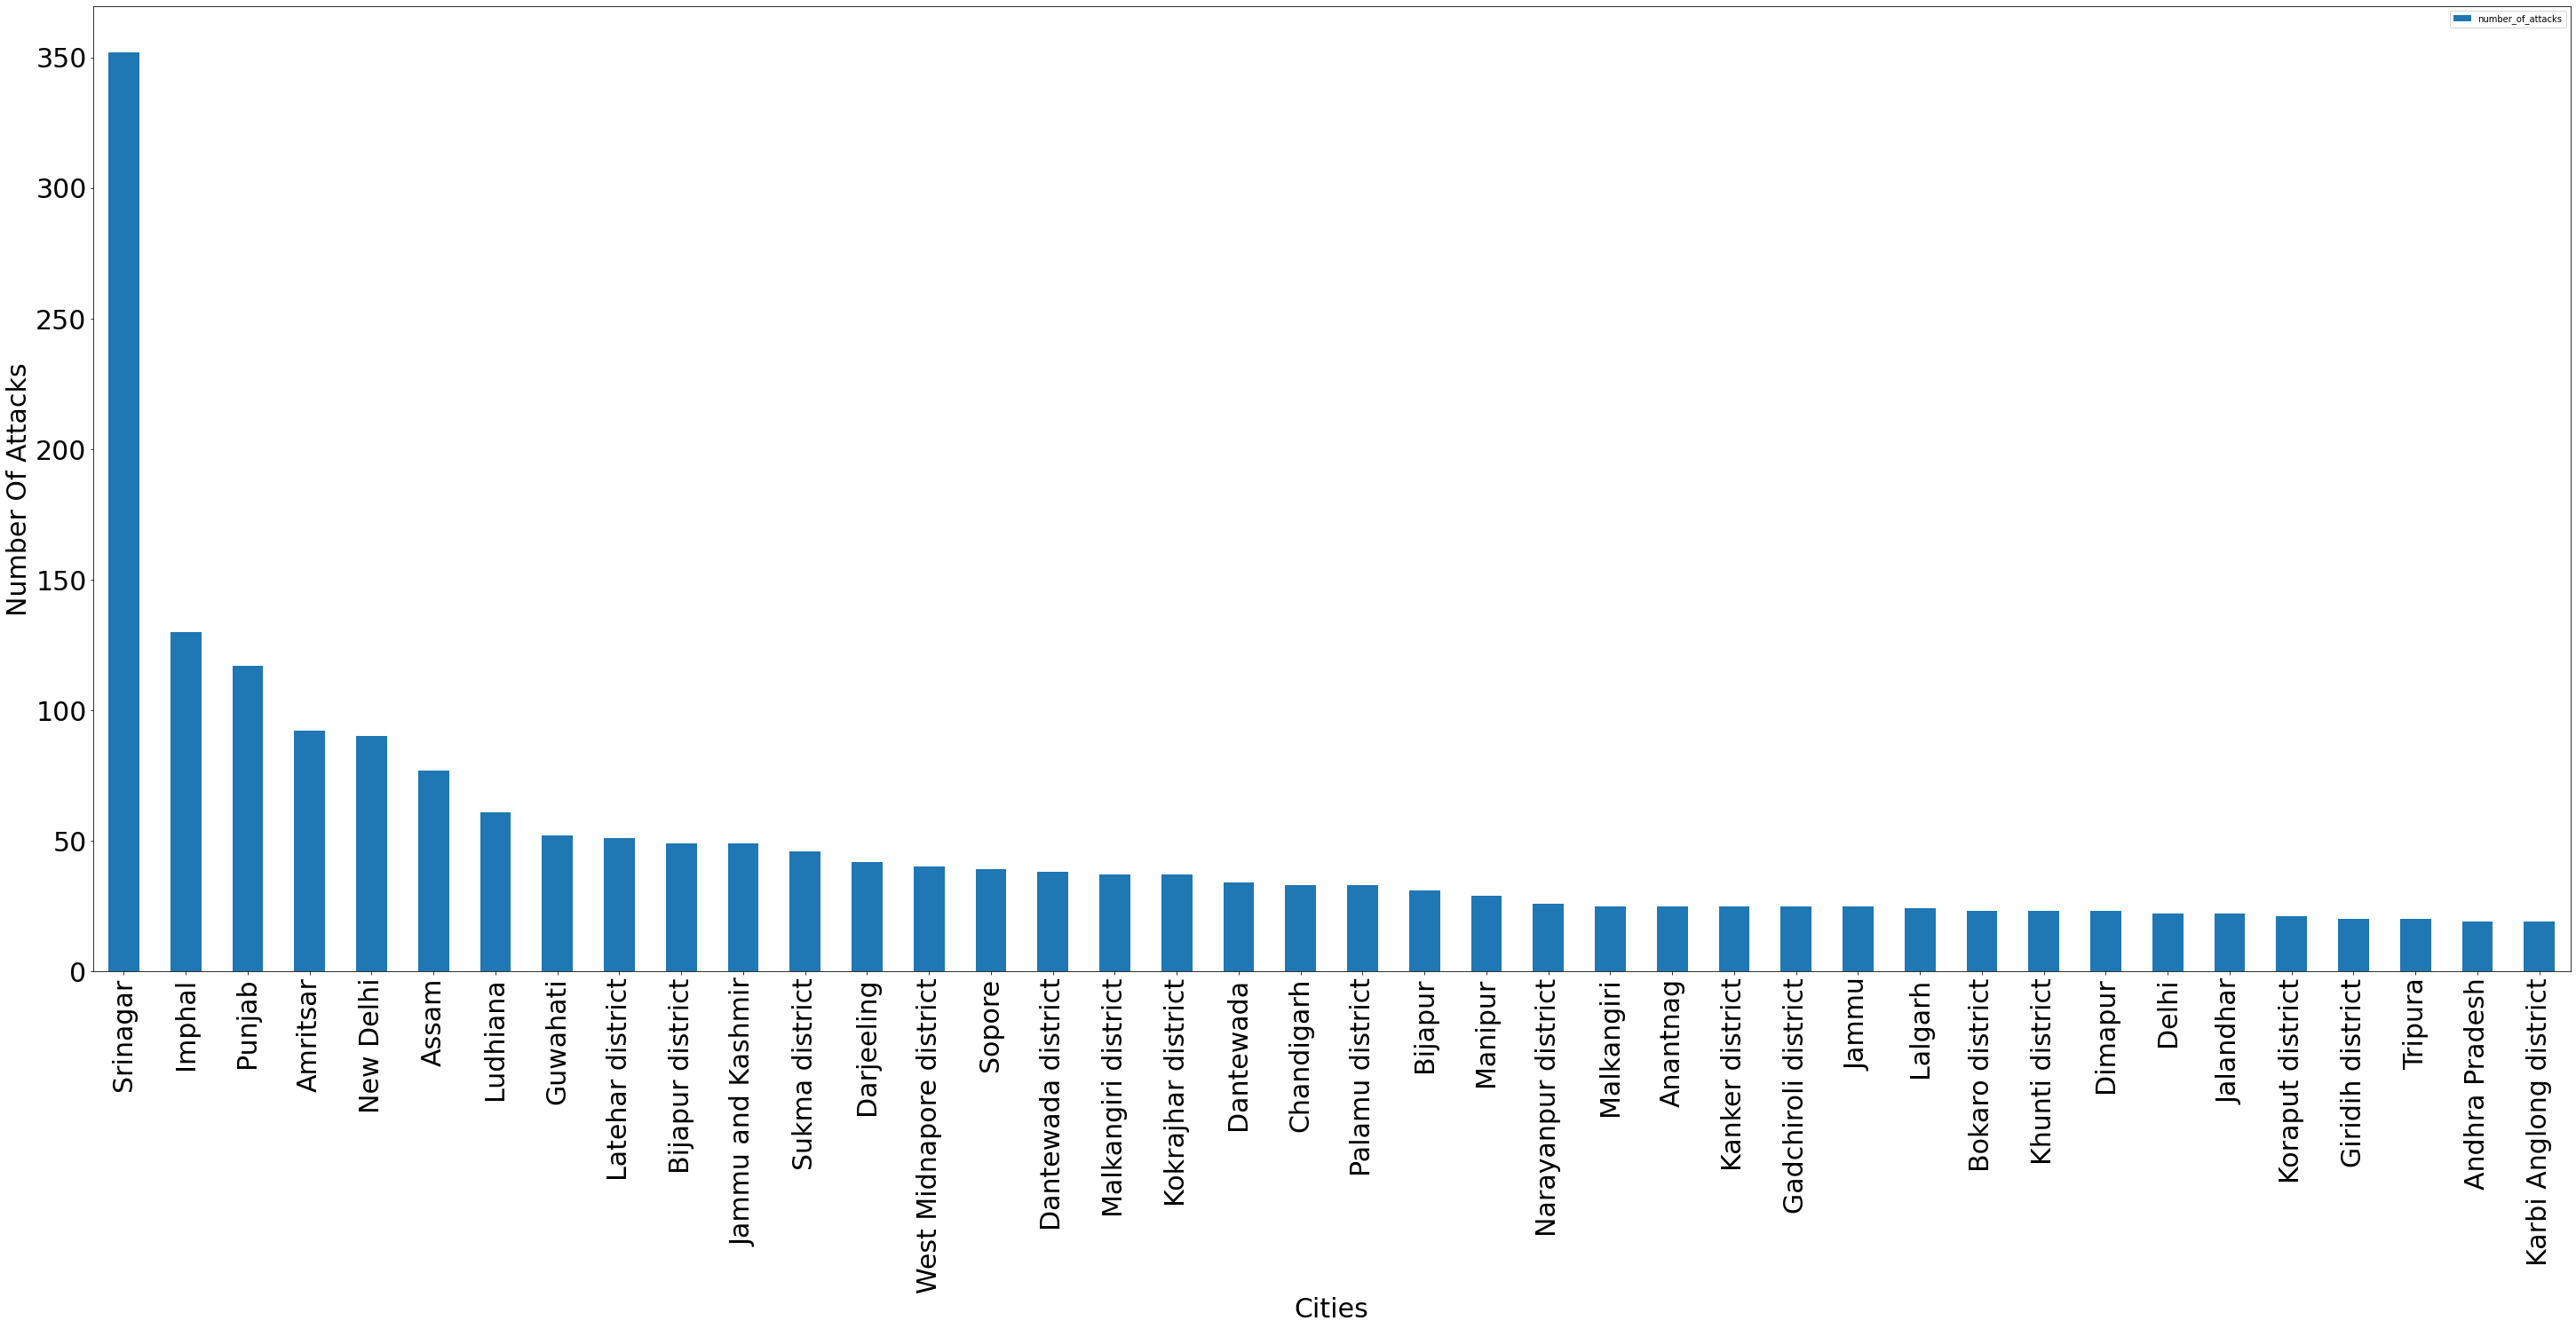

In [271]:

plt.rcParams["figure.figsize"] = (50, 20)
df_sorted_city_by_attacks.head(40).plot(kind='bar',x='unique_cities',y='number_of_attacks')
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt. xlabel('Cities', fontsize=30)
plt. ylabel('Number Of Attacks', fontsize=30)


Text(0, 0.5, 'Number Of Attacks')

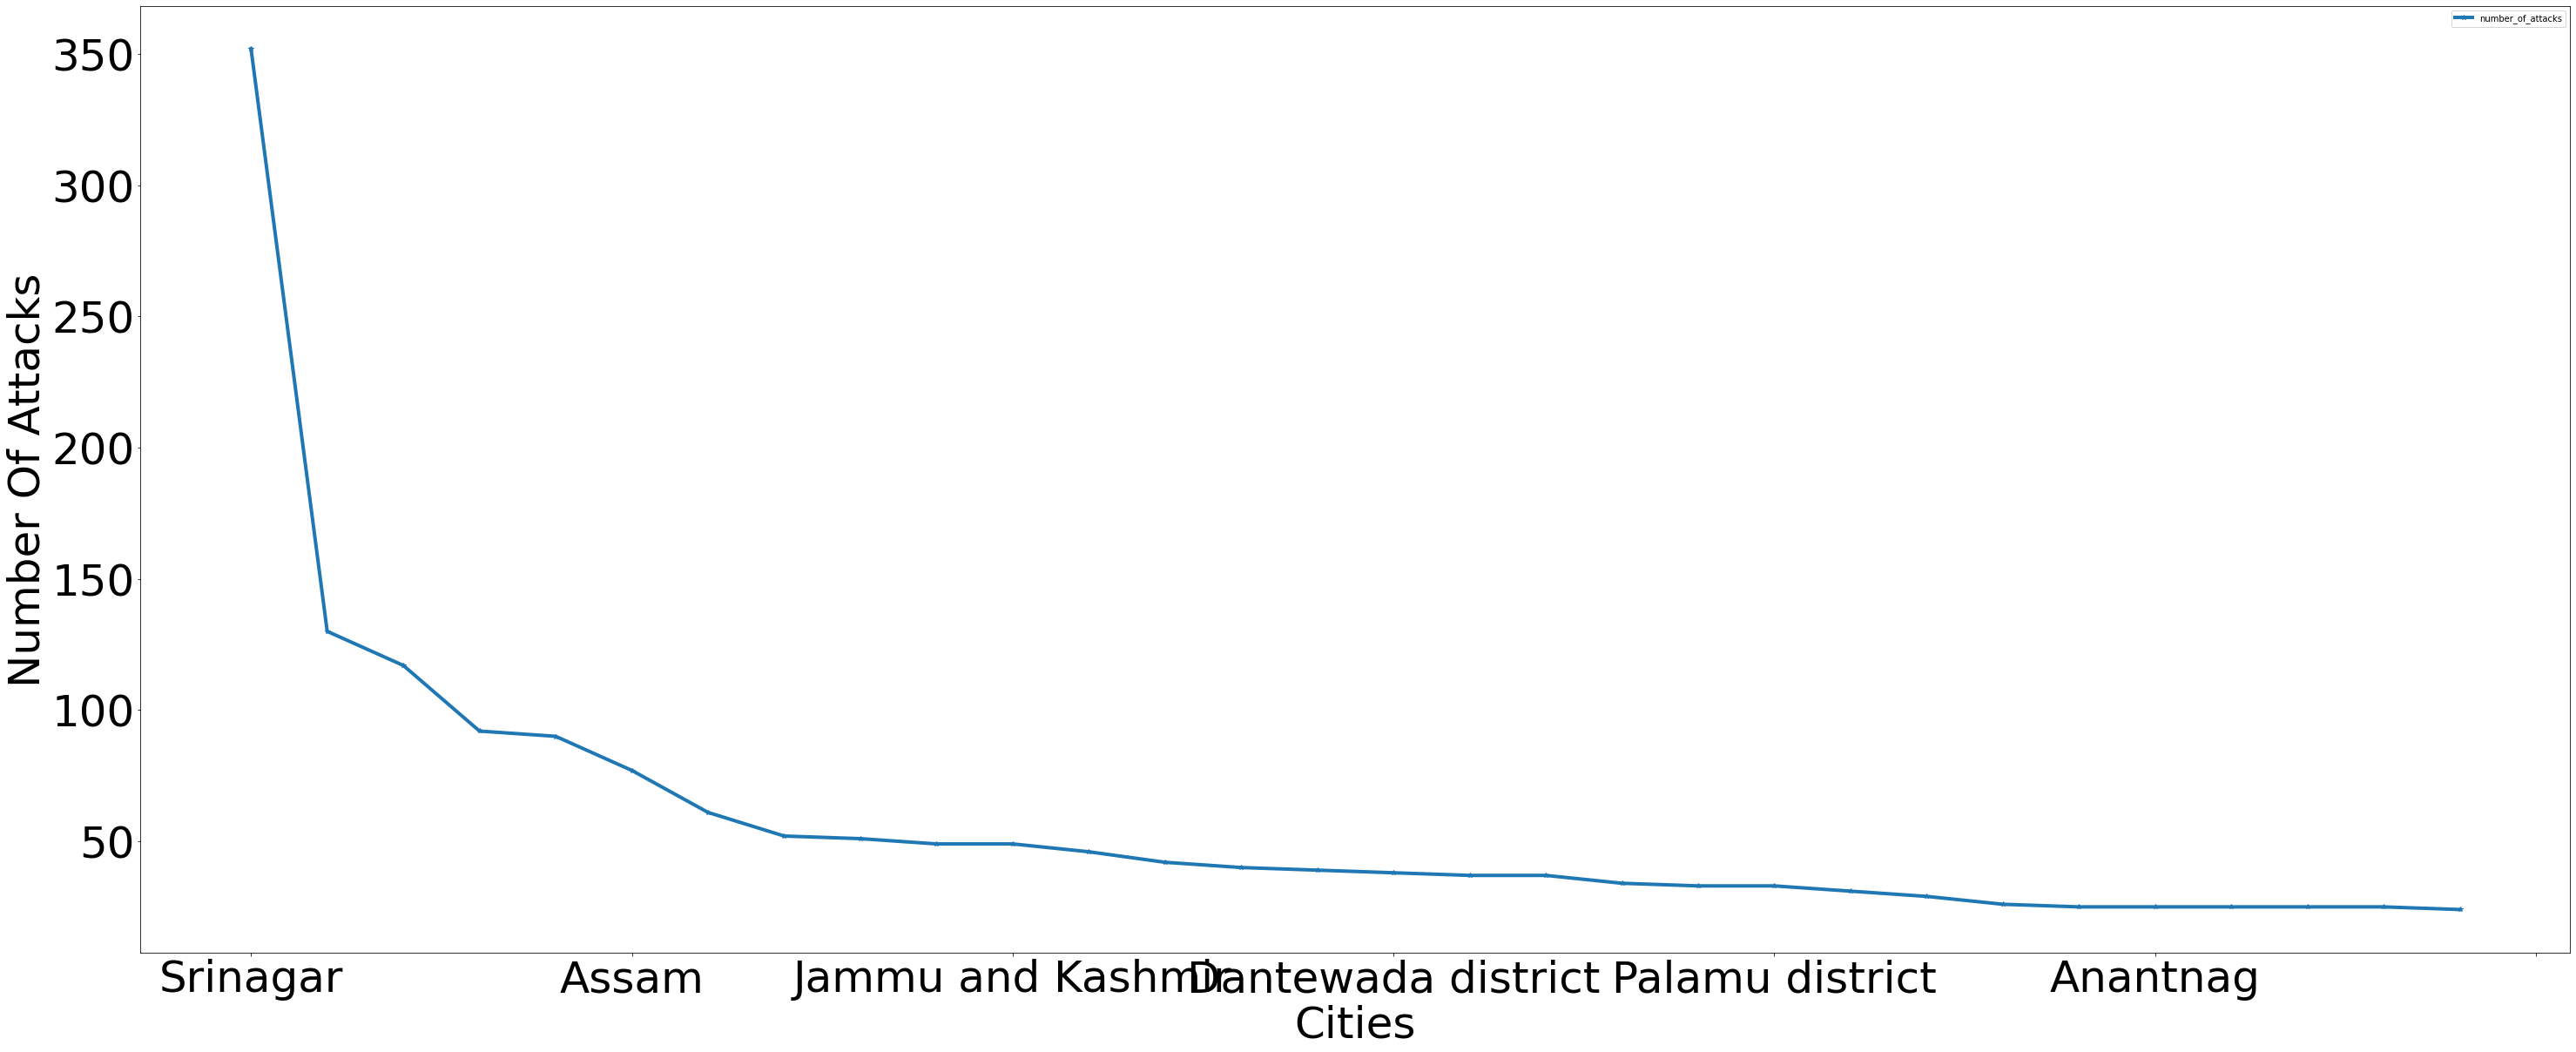

In [258]:
df_sorted_city_by_attacks.head(30).plot(x='unique_cities',y='number_of_attacks')
plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
plt. xlabel('Cities', fontsize=50)
plt. ylabel('Number Of Attacks', fontsize=50)

#Top state by number of attacks vs. Terrorist group

In [344]:
statewise_terrorist_attack_group=pd.DataFrame(df_India, columns=['state','terrorist_group','attack_type','total_kills' ])
statewise_terrorist_attack_group.groupby(['state','terrorist_group']).agg({'terrorist_group':'count'})

terrorist_group
state          terrorist_group                                                
Andhra Pradesh Base Movement                                                 2
               Bodo Militants                                                1
               Communist Party of India - Maoist (CPI-Maoist)               54
               Communist Party of India- Marxist-Leninist                    1
               Congress Party Activists                                      1
...                                                                        ...
West Bengal    Political Group                                               1
               Sikh Extremists                                               2
               Tripura National Volunteers (TNV)                             7
               United Achik National Front (UANF)                            1
               United Liberation Front of Assam (ULFA)                       1

[615 rows x 1 columns]

# Number of Damage vs Type of Attack

1.   List item
2.   List item



In [297]:
terrorist_attack_group=pd.DataFrame(df_India, columns=['city','terrorist_group','attack_type','total_kills' ])
terrorist_attack_group.sort_values('total_kills', ascending= False)

,city,terrorist_group,attack_type,total_kills
81098,Mumbai,Lashkar-e-Taiba (LeT),Bombing/Explosion,188.0
54416,Bombay,Muslim Militants,Armed Assault,115.0
96726,Jhargam,Communist Party of India - Maoist (CPI-Maoist),Unknown,115.0
95988,Dantewada district,Communist Party of India - Maoist (CPI-Maoist),Armed Assault,82.0
56912,Banabari,Bodo Militants,Armed Assault,70.0
...,...,...,...,...
99741,Jajpur,Communist Party of India - Maoist (CPI-Maoist),Bombing/Explosion,0.0
99739,Hotwag,Communist Party of India - Maoist (CPI-Maoist),Bombing/Explosion,0.0
99679,Marda,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0
99676,Halewara,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0


In [219]:
index_names = terrorist_attack_group[ terrorist_attack_group['terrorist_group'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)

In [298]:
terrorist_attack_group

,city,terrorist_group,attack_type,total_kills
1186,New Delhi,Palestinians,Hijacking,0.0
2764,Samastipur,Ananda Marga,Bombing/Explosion,4.0
5327,Bombay,Japanese Red Army (JRA),Hijacking,0.0
7337,Assam,Naga People,Armed Assault,2.0
8174,Manipur,Meitei extremists,Armed Assault,4.0
...,...,...,...,...
181606,Sahajpur-Sahiyaar,Maoists,Facility/Infrastructure Attack,0.0
181612,Motbung,Manipur Naga People's Army (MNPA),Hostage Taking (Kidnapping),0.0
181665,Toylanka,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0
181672,Lethapora,Jaish-e-Mohammad (JeM),Armed Assault,8.0


In [301]:
index_names = terrorist_attack_group[ terrorist_attack_group['attack_type'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)
terrorist_attack_group

,city,terrorist_group,attack_type,total_kills
1186,New Delhi,Palestinians,Hijacking,0.0
2764,Samastipur,Ananda Marga,Bombing/Explosion,4.0
5327,Bombay,Japanese Red Army (JRA),Hijacking,0.0
7337,Assam,Naga People,Armed Assault,2.0
8174,Manipur,Meitei extremists,Armed Assault,4.0
...,...,...,...,...
181606,Sahajpur-Sahiyaar,Maoists,Facility/Infrastructure Attack,0.0
181612,Motbung,Manipur Naga People's Army (MNPA),Hostage Taking (Kidnapping),0.0
181665,Toylanka,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0
181672,Lethapora,Jaish-e-Mohammad (JeM),Armed Assault,8.0


In [309]:
attack_type_killings= terrorist_attack_group.groupby(['attack_type'])['total_kills'].sum().rename_axis('attack_type').reset_index(name='total_kills')
attack_type_killings.sort_values('total_kills', ascending= False)

,attack_type,total_kills
0,Armed Assault,7340.0
2,Bombing/Explosion,4116.0
1,Assassination,1285.0
6,Hostage Taking (Kidnapping),942.0
3,Facility/Infrastructure Attack,136.0
5,Hostage Taking (Barricade Incident),130.0
4,Hijacking,39.0
7,Unarmed Assault,23.0


Text(0, 0.5, 'attack_type')

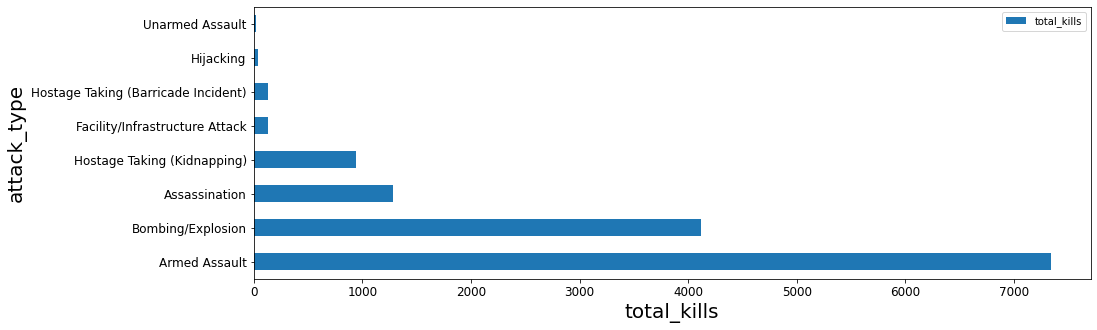

In [333]:
plt.rcParams["figure.figsize"] = (15, 5)
attack_type_killings.sort_values('total_kills', ascending= False).plot(kind='barh',x='attack_type',y='total_kills')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt. xlabel('total_kills', fontsize=20)
plt. ylabel('attack_type', fontsize=20)


Text(0, 0.5, 'total_kills')

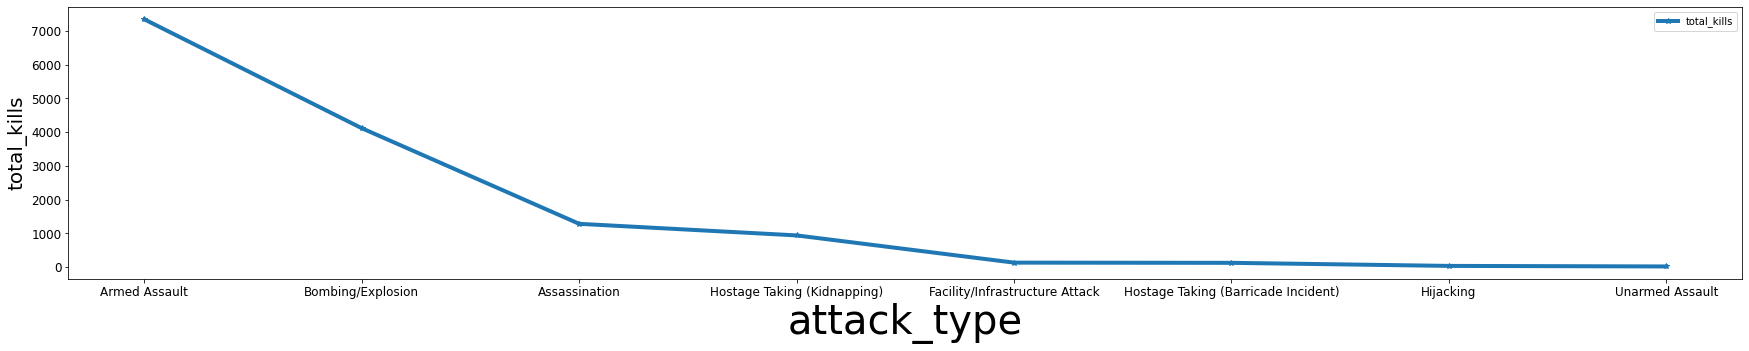

In [326]:
plt.rcParams["figure.figsize"] = (30, 5)
attack_type_killings.sort_values('total_kills', ascending= False).plot(x='attack_type',y='total_kills')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt. xlabel('attack_type', fontsize=40)
plt. ylabel('total_kills', fontsize=20)

#Number of Attacks happen in each year '''

In [279]:
df_number_of_attacks_by_years =df_India['year'].value_counts().rename_axis('year').reset_index(name='number_of_attacks')
df_number_of_attacks_by_years

,year,number_of_attacks
0,2017,615
3,2016,574
2,2015,581
4,2014,564
7,2013,443
8,2012,379
5,2011,519
1,2010,589
6,2009,515
9,2008,318


Text(0.5, 1.0, 'number of attacks on year basis')

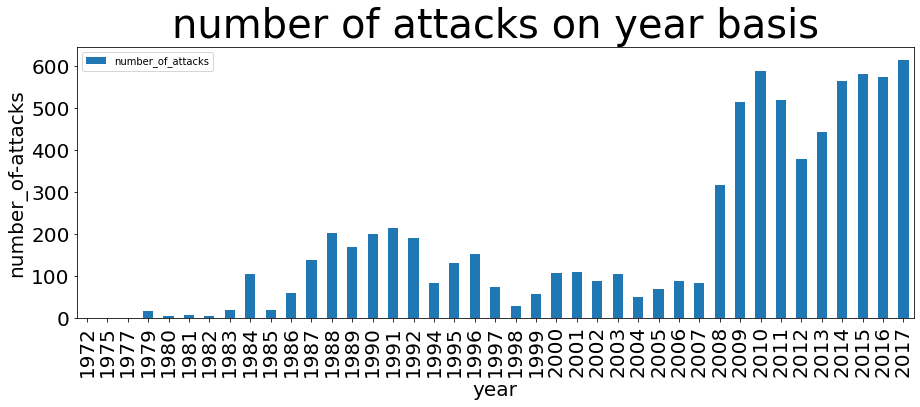

In [337]:
df_number_of_attacks_by_years.sort_values('year',ascending= True).plot(kind='bar',x='year',y='number_of_attacks')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('number_of-attacks', fontsize=20)
plt.title('number of attacks on year basis', fontsize=40)



Text(0.5, 1.0, 'number of attacks on year basis')

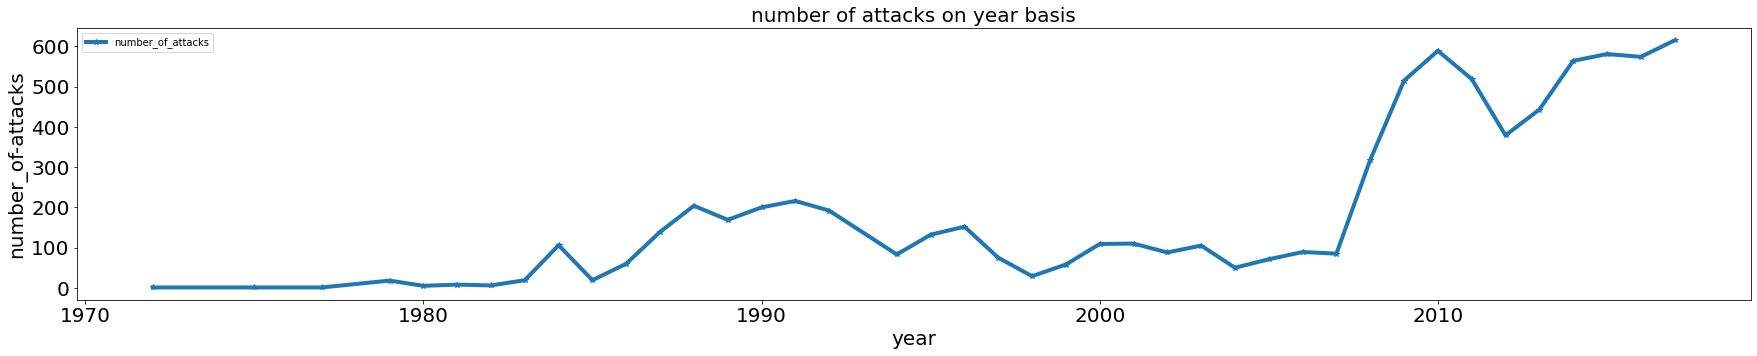

In [296]:
plt.rcParams["figure.figsize"] = (30, 5)
df_number_of_attacks_by_years.sort_values('year',ascending= False).plot(x='year',y='number_of_attacks')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('number_of-attacks', fontsize=20)
plt.title('number of attacks on year basis', fontsize=20)